In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv(r'C:\Users\praje\OneDrive\AppData\Desktop\project\UYIR\Synthetic_dataset_generation\synthetic_driving_data_with_behavior_and_accident.csv')

df.head()



,speed,rpm,throttle,g_force,acceleration,brake_pressure,steering_angle,accident_severity,driver_behavior
0,44.944814,1392.425372,0.261706,3.363515,0.719959,0.393636,13.343126,0,0
1,114.085717,2534.083032,0.246979,3.983407,3.054323,0.473436,-29.485227,0,0
2,87.839273,3593.426675,0.906255,1.252339,2.601609,0.854547,33.515511,0,0
3,71.839018,3143.119637,0.249546,3.124370,-3.461001,0.340004,10.180462,1,0
4,18.722237,3380.995673,0.271950,2.858730,-3.507505,0.869650,-30.851650,1,0


In [13]:
X = df.drop(columns=['accident_severity', 'driver_behavior'])
y = df['accident_severity']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

In [17]:
import joblib
X_train_scaled = scaler.fit_transform(X_train)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [18]:
X_test_scaled = scaler.transform(X_test)

accident_model = RandomForestClassifier(n_estimators=100, random_state=42)
accident_model.fit(X_train_scaled, y_train)

y_pred = accident_model.predict(X_test_scaled)

In [19]:
print("Accident Severity Classification Report:")
print(classification_report(y_test, y_pred))

Accident Severity Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       213
           1       0.98      0.99      0.98        82
           2       1.00      0.20      0.33         5

    accuracy                           0.98       300
   macro avg       0.98      0.73      0.77       300
weighted avg       0.98      0.98      0.97       300



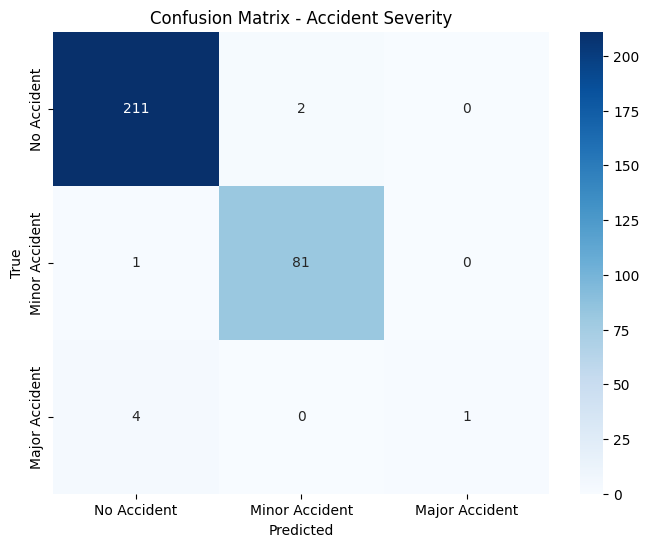

In [20]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Accident', 'Minor Accident', 'Major Accident'],
            yticklabels=['No Accident', 'Minor Accident', 'Major Accident'])
plt.title('Confusion Matrix - Accident Severity')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
joblib.dump(accident_model, 'accident_severity_model.pkl')

['accident_severity_model.pkl']